### Problem Statement

#### A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


#### In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


#### They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

### AIM

#### we are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Step 1: Reading and Understanding the Data

#### Importing Numpy and Pandas for reading and understanding the data

In [1]:
import numpy as np
import pandas as pd

# To ignore any warnings while plotting

import warnings
warnings.filterwarnings("ignore")

#### reading the dataset

In [2]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
df.shape

(730, 16)

#### we can see that all the entries are filled, we can skip dropping of rows or columns

In [5]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### checking duplicate entries

In [6]:
df.duplicated().sum()

0

#### there are no duplicate entries

In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### we can drop instant column since it is only an index

In [8]:
df = df.drop(['instant'],axis = 1)
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### we can also drop dteday, since we have dteday spilt into year, month, and weekday which we can use for our analysis

In [9]:
df = df.drop(['dteday'], axis=1)

### Step 2: Visualizing the Data

#### importing matplotlib and seaborn

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### visualizing numeric variables
#### let's make a pair plot to visualize numeric variables

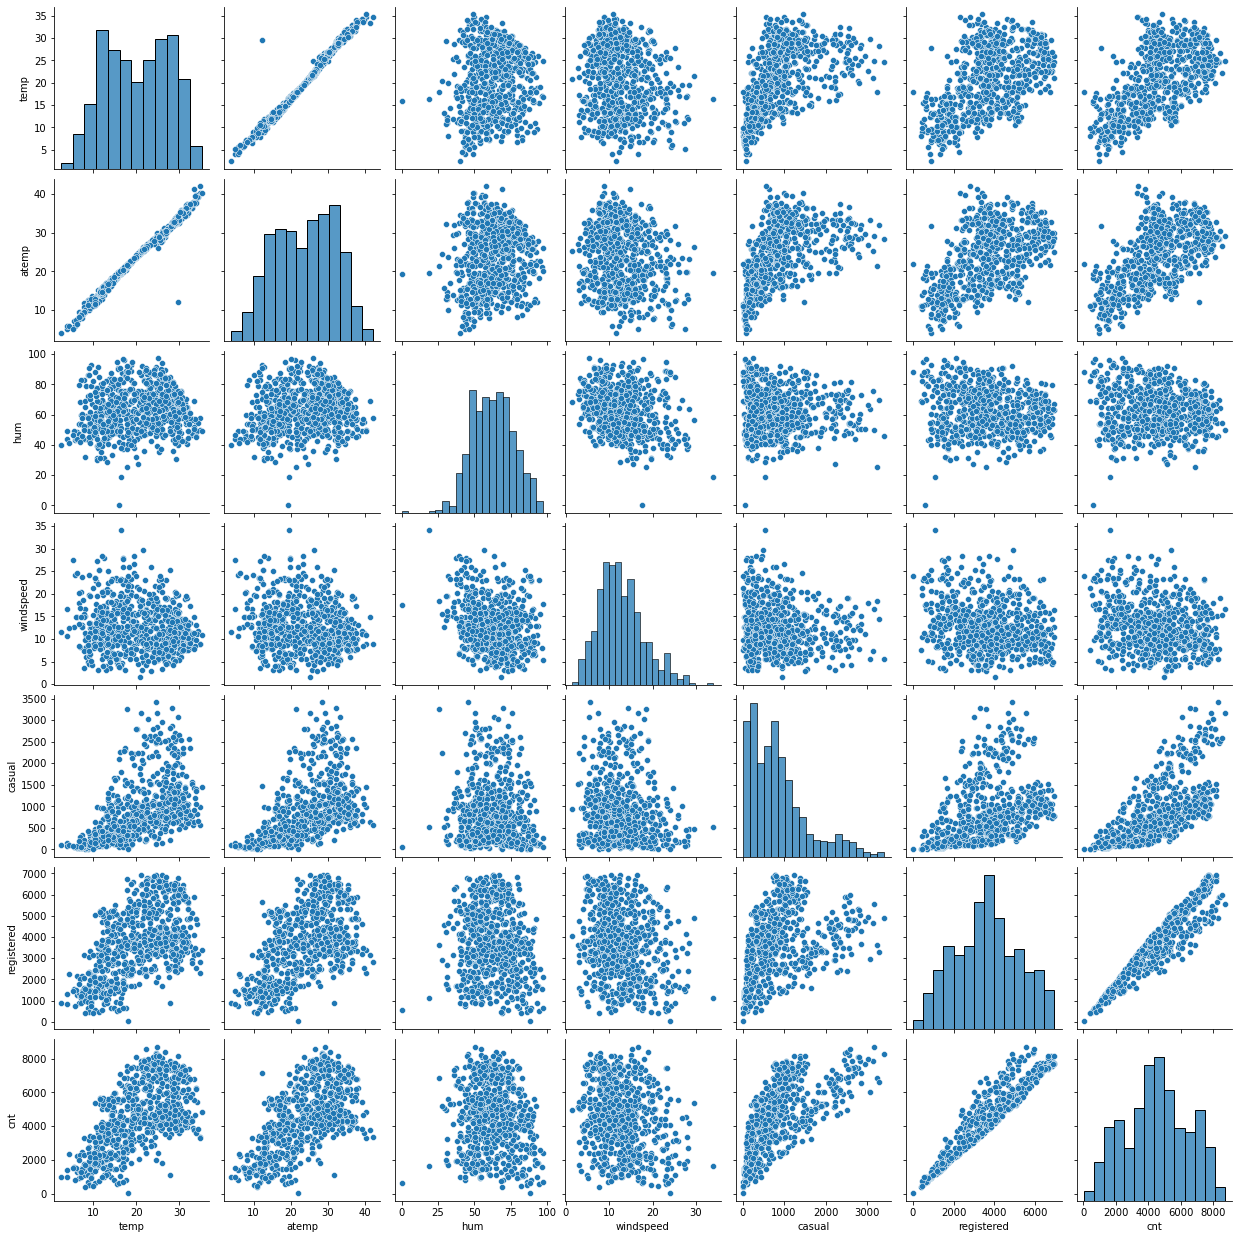

In [12]:
# Only the following variables are considered numeric since they have continuous values, rest all variables have Definite values

numeric = ['temp','atemp','hum','windspeed','casual','registered','cnt']
sns.pairplot(df[numeric])
plt.show()

#### cnt is our target variable
#### from the paiplot we see that temp, atemp, registered and casual are somewhat linearly related to cnt
#### on the other hand humidity and windspeed are scattered over the plot

#### we can slo see that there is a very strong correlation between temp and atemp, this might lead to high VIF in our analysis, which we will analyze in a short while

#### visualizing categorical variables

In [13]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


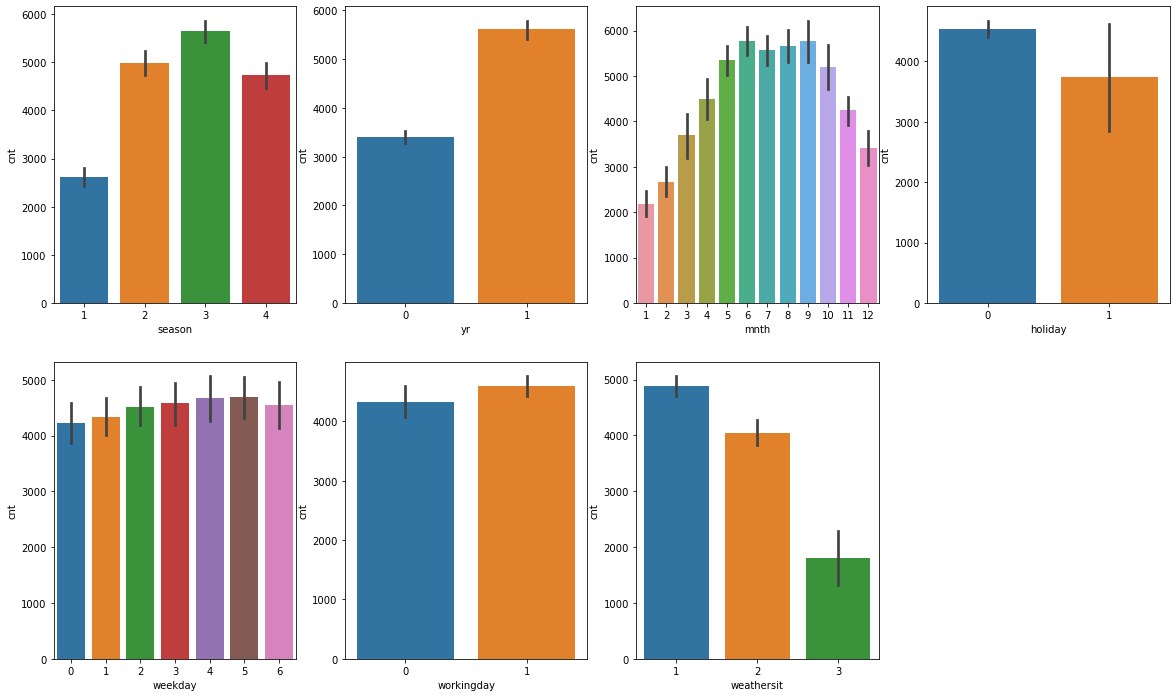

In [14]:
plt.figure(figsize=(20,12))
plt.subplot(2,4,1)
sns.barplot(df['season'],df['cnt'])
plt.subplot(2,4,2)
sns.barplot(df['yr'],df['cnt'])
plt.subplot(2,4,3)
sns.barplot(df['mnth'],df['cnt'])
plt.subplot(2,4,4)
sns.barplot(df['holiday'],df['cnt'])
plt.subplot(2,4,5)
sns.barplot(df['weekday'],df['cnt'])
plt.subplot(2,4,6)
sns.barplot(df['workingday'],df['cnt'])
plt.subplot(2,4,7)
sns.barplot(df['weathersit'],df['cnt'])
plt.show()

#### we can see that season and month barplot is quite similar and we can consider season for our analysis as different months are binned in these seasons

#### we can also see that there is very little difference between successive days of week in weekday barplot and the somewhat similar behaviour is captured by workingday, so we can proceed with workingday for our analysis, i.e more bikes are rented during working days than weekends which are usually non working days, however there is only a small difference.

### Step 3: Data Preparation

#### we need to first convert season and weathersit into categorical values so that we can get dummy variables out of them

In [15]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### converting season to categorical values

In [16]:
def convert_season(x):
    if x==1:
        return "spring"
    elif x==2:
        return "summer"
    elif x==3:
        return "fall"
    elif x==4:
        return "winter"
df['season'] = df['season'].apply(convert_season)

In [17]:
df['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

#### converting weathersit to categorical values

In [18]:
def convert_weather(x):
    if x==1:
        return "clear"
    elif x==2:
        return "misty"
    elif x==3:
        return "rainy_or_snowy"
    elif x==4:
        return "extreme"
        
df['weathersit'] = df['weathersit'].apply(convert_weather)

In [19]:
df['weathersit'].value_counts()

clear             463
misty             246
rainy_or_snowy     21
Name: weathersit, dtype: int64

#### now we create dummy variables

#### variable season has 4 levels so we need only three levels to represent this varaible

In [20]:
status1 = pd.get_dummies(df['season'], drop_first=True)
status1.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


#### The different levels can be interpreted as 
1. spring : 100
2. summer : 010
3. winter : 001
4. fall : 000

#### creating dummies for weathersit

In [21]:
status2 = pd.get_dummies(df['weathersit'], drop_first=True)
status2.head()

,misty,rainy_or_snowy
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


#### The different levels can be interpreted as 
1. misty : 10
2. rainy_or_snowy : 01
3. clear : 00

#### we can now drop the columns from which dummy varaibles were derived, we can also drop month and weekday since we wont be using those for our analysis

In [22]:
df = df.drop(['season','weathersit','mnth','weekday'], axis = 1)

In [23]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
0,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985
1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### concatenating our dummy variables to the dataset

In [24]:
df = pd.concat([df,status1], axis = 1)
df = pd.concat([df,status2], axis = 1)
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,misty,rainy_or_snowy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0,0


### Step 4: Splitting the data into training and test sets

#### importing the train_test_split from sklearn

In [25]:
from sklearn.model_selection import train_test_split

# to get psuedo random split
np.random.seed(0)

#### performing the split

In [26]:
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

In [27]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,misty,rainy_or_snowy
653,1,0,1,19.201653,23.0423,55.8333,12.208807,922,6612,7534,0,0,1,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,968,6248,7216,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,956,3110,4066,1,0,0,1,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,364,1432,1796,1,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,1120,3100,4220,0,1,0,1,0


In [28]:
df_train.shape

(510, 15)

In [29]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,misty,rainy_or_snowy
184,0,1,0,29.793347,33.27085,63.7917,5.459106,3065,2978,6043,0,0,0,1,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,872,5339,6211,0,1,0,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,240,2419,2659,0,0,1,1,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,884,3896,4780,0,0,0,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,736,4232,4968,0,1,0,0,0


In [30]:
df_test.shape

(219, 15)

#### now we can see that temp, atemp, humidity, windspeed etc are on a different scale and the categorical variables are on a different scale, so in order to make interpretation of these variables in the model easy we perform scaling.

#### here we will be performing min max scaling
#### importing minmax scaler

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#### apply the scaler to all the numeric columns

In [32]:
num_vars = ['temp','atemp','hum','windspeed','casual','registered','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [33]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,misty,rainy_or_snowy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.280402,0.951776,0.864243,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255,1,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096,1,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973,0,1,0,1,0


In [34]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,misty,rainy_or_snowy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.254661,0.523944,0.513620,0.243137,0.245098,0.24902,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.206011,0.228175,0.224593,0.429398,0.430568,0.43287,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.094179,0.353487,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.212740,0.525123,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.327415,0.696073,0.684710,0.000000,0.000000,0.00000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


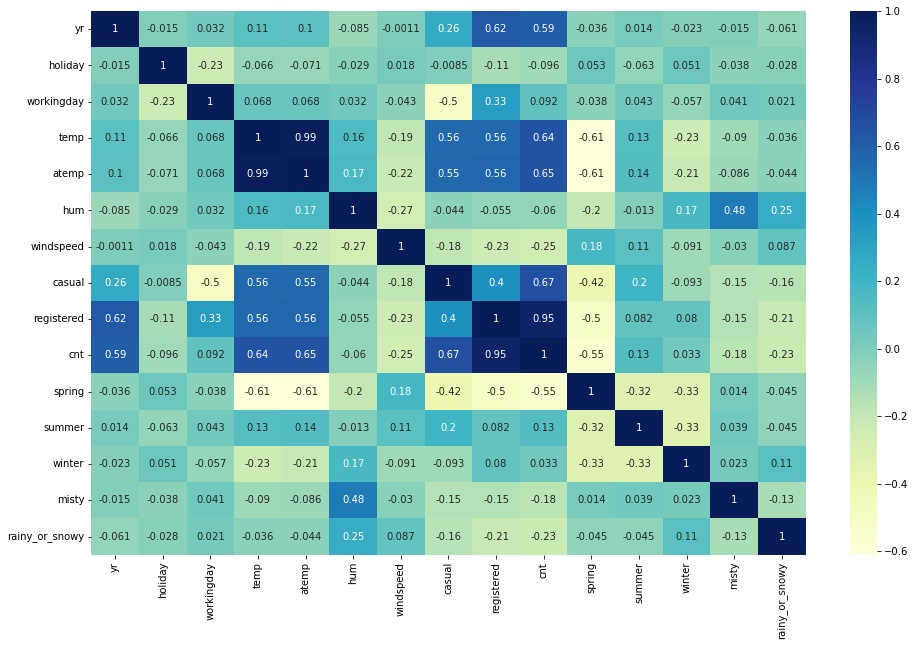

In [35]:
# Let's check correlation coefficients to see which variables are higly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap='YlGnBu')
plt.show()

#### here we can see that there is a very high correlation between yr and registered, also between temp and atemp. temp and atemp are in turn highly correlated to registered and casual

#### Since the number of variables are less we follow a manual top down approach where we start with a all variables and keep on removing variables

### Dividing X and Y sets for model building

In [36]:
y_train = df_train.pop('cnt')
X_train = df_train

### Step 5: Building a Linear Model

#### importing statsmodels

In [37]:
import statsmodels.api as sm

In [38]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

In [39]:
# Create a model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.896e+30
Date:                Sat, 27 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:41:41   Log-Likelihood:                 16907.
No. Observations:                 510   AIC:                        -3.378e+04
Df Residuals:                     495   BIC:                        -3.372e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -6.245e-17      4e-16     -0.156      0.876   -8.48e-16    7.23e-16
yr              1.128e-16   1.49e-16      0.759      0.448   -1.79e-16    4.05e-16
holiday        -1.124e-15    2.9e-16     -3.870      0.000   -1.69e-15   -5.53e-16
workingday     -1.145e-16   1.73e-16     -0.663      0.508   -4.54e-16    2.25e-16
temp            1.443e-15   1.49e-15      0.970      0.332   -1.48e-15    4.37e-15
atemp          -6.661e-16    1.5e-15     -0.444      0.657   -3.62e-15    2.28e-15
hum            -1.527e-16   4.14e-16     -0.368      0.713   -9.67e-16    6.61e-16
windspeed       5.551e-16   2.98e-16      1.860      0.063   -3.13e-17    1.14e-15
casual             0.3775   4.21e-16   8.96e+14      0.000       0.377       0.377
registered         0.7968      5e-16   1.59e+15      0.000       0.797       0.797
spring          6.939e-18   2.22e-16      0.031      0.975   -4.29e-16    4.43e-16
summer          2.776e-16   1.52e-16      1.831      0.068   -2.03e-17    5.75e-16
winter           1.11e-16   1.86e-16      0.596      0.552   -2.55e-16    4.77e-16
misty           1.232e-16   1.18e-16      1.046      0.296   -1.08e-16    3.54e-16
rainy_or_snowy  -1.11e-16   3.12e-16     -0.356      0.722   -7.24e-16    5.02e-16
==============================================================================
Omnibus:                       77.987   Durbin-Watson:                   0.307
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.866
Skew:                           0.955   Prob(JB):                     4.66e-28
Kurtosis:                       4.509   Cond. No.                         90.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### we can see here that many variables have larger p values and hence are insignificant, we can simply drop the variable with highest p value, we can supplement this using VIF

#### importing variance_inflation_factor

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
# create a dataframe that will contain the names of all the variables and their respective VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns

In [42]:
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,temp,391.78
4,atemp,366.07
8,registered,41.12
5,hum,27.42
2,workingday,10.47
7,casual,9.69
0,yr,5.76
6,windspeed,5.01
9,spring,3.96
11,winter,3.86


#### any variable with a VIF greater than 5 has a very high correlation to other variables, we can see here temp and atemp have very high VIF. First let us drop the variables with highest p value, which is spring in our case

In [43]:
X = X_train.drop(['spring'], axis = 1)

#### building second model

In [44]:
X_train_lm = sm.add_constant(X)
lr1 = sm.OLS(y_train, X_train_lm).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.325e+29
Date:                Sat, 27 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:41:41   Log-Likelihood:                 16444.
No. Observations:                 510   AIC:                        -3.286e+04
Df Residuals:                     496   BIC:                        -3.280e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3.678e-16   7.86e-16      0.468      0.640   -1.18e-15    1.91e-15
yr             -2.082e-17   3.62e-16     -0.058      0.954   -7.31e-16    6.89e-16
holiday         1.561e-16    7.2e-16      0.217      0.828   -1.26e-15    1.57e-15
workingday      8.014e-16   4.26e-16      1.880      0.061   -3.61e-17    1.64e-15
temp            6.661e-16   3.53e-15      0.189      0.851   -6.28e-15    7.61e-15
atemp           -1.11e-16   3.69e-15     -0.030      0.976   -7.37e-15    7.15e-15
hum             5.274e-16   1.02e-15      0.515      0.607   -1.48e-15    2.54e-15
windspeed       3.192e-16   7.37e-16      0.433      0.665   -1.13e-15    1.77e-15
casual             0.3775   1.04e-15   3.62e+14      0.000       0.377       0.377
registered         0.7968   1.22e-15   6.55e+14      0.000       0.797       0.797
summer          2.498e-16   2.88e-16      0.867      0.386   -3.16e-16    8.16e-16
winter          2.845e-16   3.33e-16      0.855      0.393    -3.7e-16    9.39e-16
misty            3.14e-16    2.9e-16      1.084      0.279   -2.55e-16    8.83e-16
rainy_or_snowy  1.041e-16   7.66e-16      0.136      0.892    -1.4e-15    1.61e-15
==============================================================================
Omnibus:                       28.670   Durbin-Watson:                   0.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.346
Skew:                           0.495   Prob(JB):                     1.90e-06
Kurtosis:                       2.490   Cond. No.                         88.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### computing VIF again

In [45]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,temp,360.97
4,atemp,359.44
8,registered,40.90
5,hum,16.32
2,workingday,10.02
7,casual,9.38
0,yr,5.68
6,windspeed,3.79
10,winter,2.36
11,misty,2.32


#### here we can see that atemp has high p values as well as high VIF, and hence it can be dropped

In [46]:
X = X.drop('atemp', axis=1)

#### building 3rd model

In [47]:
X_train_lm = sm.add_constant(X)
lr1 = sm.OLS(y_train, X_train_lm).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.381e+29
Date:                Sat, 27 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:41:41   Log-Likelihood:                 16199.
No. Observations:                 510   AIC:                        -3.237e+04
Df Residuals:                     497   BIC:                        -3.232e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.332e-15   1.27e-15      1.052      0.293   -1.16e-15    3.82e-15
yr              3.123e-17   5.84e-16      0.053      0.957   -1.12e-15    1.18e-15
holiday         2.082e-17   1.16e-15      0.018      0.986   -2.26e-15     2.3e-15
workingday      1.041e-15   6.88e-16      1.512      0.131   -3.11e-16    2.39e-15
temp            7.216e-16    1.4e-15      0.516      0.606   -2.03e-15    3.47e-15
hum             6.106e-16   1.65e-15      0.370      0.712   -2.63e-15    3.85e-15
windspeed       3.608e-16   1.17e-15      0.308      0.758   -1.94e-15    2.66e-15
casual             0.3775   1.69e-15   2.24e+14      0.000       0.377       0.377
registered         0.7968   1.97e-15   4.05e+14      0.000       0.797       0.797
summer          1.388e-16    4.6e-16      0.302      0.763   -7.65e-16    1.04e-15
winter          4.059e-16   5.33e-16      0.761      0.447   -6.42e-16    1.45e-15
misty           4.753e-16   4.67e-16      1.017      0.309   -4.43e-16    1.39e-15
rainy_or_snowy  2.082e-16   1.23e-15      0.169      0.866   -2.21e-15    2.63e-15
==============================================================================
Omnibus:                       25.692   Durbin-Watson:                   0.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.377
Skew:                           0.522   Prob(JB):                     1.87e-06
Kurtosis:                       2.610   Cond. No.                         24.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### computing VIF again

In [48]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
7,registered,40.89
3,temp,21.57
4,hum,15.85
2,workingday,10.02
6,casual,9.38
0,yr,5.68
5,windspeed,3.67
9,winter,2.33
10,misty,2.31
8,summer,1.69


#### we see here VIF has dropped drastically. next we see that p value of holiday is very high, so dropping holiday here

In [49]:
X = X.drop('holiday', axis=1)

In [50]:
X_train_lm = sm.add_constant(X)
lr1 = sm.OLS(y_train, X_train_lm).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.814e+29
Date:                Sat, 27 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:41:41   Log-Likelihood:                 16358.
No. Observations:                 510   AIC:                        -3.269e+04
Df Residuals:                     498   BIC:                        -3.264e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.048e-15   9.18e-16      1.141      0.254   -7.56e-16    2.85e-15
yr              4.215e-16   4.27e-16      0.987      0.324   -4.17e-16    1.26e-15
workingday      5.551e-16    4.9e-16      1.133      0.258   -4.07e-16    1.52e-15
temp            8.743e-16   1.02e-15      0.857      0.392   -1.13e-15    2.88e-15
hum             6.245e-16   1.21e-15      0.517      0.605   -1.75e-15       3e-15
windspeed       2.637e-16   8.57e-16      0.308      0.758   -1.42e-15    1.95e-15
casual             0.3775   1.21e-15   3.11e+14      0.000       0.377       0.377
registered         0.7968   1.44e-15   5.54e+14      0.000       0.797       0.797
summer          1.527e-16   3.36e-16      0.454      0.650   -5.08e-16    8.14e-16
winter          6.453e-16    3.9e-16      1.654      0.099   -1.21e-16    1.41e-15
misty           3.279e-16   3.41e-16      0.960      0.337   -3.43e-16    9.99e-16
rainy_or_snowy  2.498e-16   9.01e-16      0.277      0.782   -1.52e-15    2.02e-15
==============================================================================
Omnibus:                        1.037   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.595   Jarque-Bera (JB):                1.133
Skew:                           0.095   Prob(JB):                        0.568
Kurtosis:                       2.870   Cond. No.                         24.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
6,registered,40.87
2,temp,21.48
3,hum,15.50
1,workingday,9.59
5,casual,9.18
0,yr,5.67
4,windspeed,3.66
8,winter,2.33
9,misty,2.29
7,summer,1.69


#### next we see that rainy_or_snowy has the highest p value so we drop it

In [52]:
X = X.drop('rainy_or_snowy', axis = 1)

In [53]:
X_train_lm = sm.add_constant(X)
lr1 = sm.OLS(y_train, X_train_lm).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.067e+29
Date:                Sat, 27 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:41:41   Log-Likelihood:                 16631.
No. Observations:                 510   AIC:                        -3.324e+04
Df Residuals:                     499   BIC:                        -3.319e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.245e-17   5.27e-16      0.118      0.906   -9.73e-16     1.1e-15
yr          5.857e-16   2.39e-16      2.447      0.015    1.15e-16    1.06e-15
workingday  3.365e-16   2.83e-16      1.188      0.235    -2.2e-16    8.93e-16
temp         1.18e-15   5.83e-16      2.024      0.044    3.45e-17    2.32e-15
hum         3.955e-16   6.73e-16      0.587      0.557   -9.28e-16    1.72e-15
windspeed  -2.706e-16   4.99e-16     -0.542      0.588   -1.25e-15     7.1e-16
casual         0.3775   7.09e-16   5.33e+14      0.000       0.377       0.377
registered     0.7968   7.91e-16   1.01e+15      0.000       0.797       0.797
summer      1.388e-16   1.96e-16      0.707      0.480   -2.47e-16    5.24e-16
winter      1.249e-16   2.23e-16      0.561      0.575   -3.12e-16    5.62e-16
misty       4.684e-17   1.86e-16      0.252      0.801   -3.18e-16    4.11e-16
==============================================================================
Omnibus:                       27.212   Durbin-Watson:                   0.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.856
Skew:                           0.305   Prob(JB):                     0.000219
Kurtosis:                       2.350   Cond. No.                         24.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
6,registered,35.23
2,temp,20.30
3,hum,14.52
1,workingday,9.46
5,casual,9.12
0,yr,5.17
4,windspeed,3.65
8,winter,2.21
9,misty,2.03
7,summer,1.68


#### now again we see that misty has the highest p value, so we drop it

In [55]:
X = X.drop('misty', axis = 1)

In [56]:
X_train_lm = sm.add_constant(X)
lr1 = sm.OLS(y_train, X_train_lm).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.303e+30
Date:                Sat, 27 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:41:41   Log-Likelihood:                 17054.
No. Observations:                 510   AIC:                        -3.409e+04
Df Residuals:                     500   BIC:                        -3.405e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.245e-17   2.25e-16     -0.278      0.781   -5.04e-16    3.79e-16
yr          2.901e-16   1.04e-16      2.794      0.005    8.61e-17    4.94e-16
workingday -4.857e-17   1.23e-16     -0.394      0.694   -2.91e-16    1.94e-16
temp        2.359e-16   2.53e-16      0.931      0.352   -2.62e-16    7.34e-16
hum          2.22e-16    2.6e-16      0.855      0.393   -2.88e-16    7.32e-16
windspeed   3.678e-16   2.17e-16      1.691      0.091   -5.94e-17    7.95e-16
casual         0.3775   3.09e-16   1.22e+15      0.000       0.377       0.377
registered     0.7968   3.44e-16   2.32e+15      0.000       0.797       0.797
summer     -8.327e-17   8.54e-17     -0.975      0.330   -2.51e-16    8.45e-17
winter      2.082e-16   9.69e-17      2.149      0.032    1.79e-17    3.98e-16
==============================================================================
Omnibus:                       12.567   Durbin-Watson:                   0.246
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                7.073
Skew:                           0.077   Prob(JB):                       0.0291
Kurtosis:                       2.444   Cond. No.                         23.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
6,registered,34.74
2,temp,20.27
3,hum,11.07
1,workingday,9.46
5,casual,9.06
0,yr,5.09
4,windspeed,3.60
8,winter,2.20
7,summer,1.67


#### in this model we see that workingday has the highest p value, so we drop it

In [58]:
X = X.drop('workingday', axis = 1)

In [59]:
X_train_lm = sm.add_constant(X)
lr1 = sm.OLS(y_train, X_train_lm).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.907e+31
Date:                Sat, 27 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:41:41   Log-Likelihood:                 17350.
No. Observations:                 510   AIC:                        -3.468e+04
Df Residuals:                     501   BIC:                        -3.464e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.192e-16   1.24e-16      2.580      0.010    7.61e-17    5.62e-16
yr          4.684e-16   5.56e-17      8.428      0.000    3.59e-16    5.78e-16
temp        4.025e-16   1.42e-16      2.842      0.005    1.24e-16    6.81e-16
hum        -4.198e-16   1.45e-16     -2.894      0.004   -7.05e-16   -1.35e-16
windspeed  -1.527e-16   1.22e-16     -1.255      0.210   -3.92e-16    8.63e-17
casual         0.3775   1.17e-16   3.24e+15      0.000       0.377       0.377
registered     0.7968   1.55e-16   5.13e+15      0.000       0.797       0.797
summer     -3.331e-16   4.74e-17     -7.027      0.000   -4.26e-16    -2.4e-16
winter     -1.249e-16   5.26e-17     -2.375      0.018   -2.28e-16   -2.16e-17
==============================================================================
Omnibus:                       70.768   Durbin-Watson:                   1.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.386
Skew:                           0.056   Prob(JB):                     0.000102
Kurtosis:                       2.077   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,temp,20.26
5,registered,19.81
2,hum,9.94
0,yr,4.56
4,casual,4.26
3,windspeed,3.55
7,winter,2.06
6,summer,1.65


#### we see here VIF has decreased to a large extent. now dropping windspeed since it has highest p value.

In [61]:
X = X.drop('windspeed', axis=1)

In [62]:
X_train_lm = sm.add_constant(X)
lr1 = sm.OLS(y_train, X_train_lm).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.590e+32
Date:                Sat, 27 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:41:41   Log-Likelihood:                 17856.
No. Observations:                 510   AIC:                        -3.570e+04
Df Residuals:                     502   BIC:                        -3.566e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.984e-16   3.55e-17     -8.400      0.000   -3.68e-16   -2.29e-16
yr         -2.038e-16   1.99e-17    -10.251      0.000   -2.43e-16   -1.65e-16
temp        3.469e-16   5.16e-17      6.727      0.000    2.46e-16    4.48e-16
hum         5.551e-17   5.06e-17      1.097      0.273    -4.4e-17    1.55e-16
casual         0.3775   4.22e-17   8.95e+15      0.000       0.377       0.377
registered     0.7968   5.44e-17   1.46e+16      0.000       0.797       0.797
summer      4.857e-17   1.72e-17      2.828      0.005    1.48e-17    8.23e-17
winter      4.163e-17   1.93e-17      2.153      0.032    3.65e-18    7.96e-17
==============================================================================
Omnibus:                       25.599   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.029
Skew:                           0.150   Prob(JB):                      0.00244
Kurtosis:                       2.310   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,temp,19.95
4,registered,19.66
2,hum,8.50
0,yr,4.43
3,casual,4.19
6,winter,2.05
5,summer,1.60


#### here humidity is a variable with both high VIF and p value so we can drop it

In [64]:
X = X.drop('hum', axis = 1)

In [65]:
X_train_lm = sm.add_constant(X)
lr1 = sm.OLS(y_train, X_train_lm).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.042e+31
Date:                Sat, 27 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:41:42   Log-Likelihood:                 17570.
No. Observations:                 510   AIC:                        -3.513e+04
Df Residuals:                     503   BIC:                        -3.510e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.939e-18   3.62e-17     -0.192      0.848    -7.8e-17    6.41e-17
yr          3.287e-16   3.45e-17      9.536      0.000    2.61e-16    3.96e-16
temp       -2.776e-17    8.4e-17     -0.330      0.741   -1.93e-16    1.37e-16
casual         0.3775   7.25e-17    5.2e+15      0.000       0.377       0.377
registered     0.7968    9.2e-17   8.66e+15      0.000       0.797       0.797
summer      1.527e-16   2.99e-17      5.104      0.000    9.39e-17    2.11e-16
winter      6.939e-18   3.21e-17      0.216      0.829   -5.61e-17       7e-17
==============================================================================
Omnibus:                       16.361   Durbin-Watson:                   0.672
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.288
Skew:                          -0.451   Prob(JB):                     0.000176
Kurtosis:                       3.037   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,registered,19.59
1,temp,12.91
0,yr,4.29
2,casual,3.98
5,winter,1.61
4,summer,1.50


#### winter has a very high p value so dropping it

In [67]:
X = X.drop('winter', axis = 1)

In [68]:
X_train_lm = sm.add_constant(X)
lr1 = sm.OLS(y_train, X_train_lm).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.877e+32
Date:                Sat, 27 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:41:42   Log-Likelihood:                 17921.
No. Observations:                 510   AIC:                        -3.583e+04
Df Residuals:                     504   BIC:                        -3.580e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.602e-16   1.69e-17    -15.363      0.000   -2.93e-16   -2.27e-16
yr           7.98e-17   1.66e-17      4.811      0.000    4.72e-17    1.12e-16
temp       -1.388e-16   3.85e-17     -3.600      0.000   -2.15e-16    -6.3e-17
casual         0.3775   3.61e-17   1.05e+16      0.000       0.377       0.377
registered     0.7968   4.26e-17   1.87e+16      0.000       0.797       0.797
summer      2.776e-17    1.4e-17      1.977      0.049     1.7e-19    5.53e-17
==============================================================================
Omnibus:                       44.667   Durbin-Watson:                   1.773
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.107
Skew:                          -0.094   Prob(JB):                     0.000524
Kurtosis:                       2.178   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,registered,15.40
1,temp,11.91
0,yr,3.99
2,casual,3.95
4,summer,1.37


#### all the variables have low p value, we can now drop the variable with high VIF value which is registered.

In [70]:
X = X.drop('registered', axis = 1)

In [71]:
X_train_lm = sm.add_constant(X)
lr1 = sm.OLS(y_train, X_train_lm).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     393.4
Date:                Sat, 27 Aug 2022   Prob (F-statistic):          1.35e-153
Time:                        15:41:42   Log-Likelihood:                 399.30
No. Observations:                 510   AIC:                            -788.6
Df Residuals:                     505   BIC:                            -767.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0958      0.013      7.132      0.000       0.069       0.122
yr             0.2086      0.010     20.440      0.000       0.189       0.229
temp           0.4133      0.026     15.734      0.000       0.362       0.465
casual         0.3457      0.030     11.524      0.000       0.287       0.405
summer         0.0072      0.012      0.617      0.537      -0.016       0.030
==============================================================================
Omnibus:                       24.813   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.461
Skew:                          -0.473   Prob(JB):                     4.00e-07
Kurtosis:                       3.700   Cond. No.                         9.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,temp,4.13
2,casual,3.92
0,yr,1.98
3,summer,1.36


#### we can see that summer has high p value so we can drop it

In [73]:
X = X.drop("summer", axis = 1)

In [74]:
X_train_lm = sm.add_constant(X)
lr1 = sm.OLS(y_train, X_train_lm).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     525.0
Date:                Sat, 27 Aug 2022   Prob (F-statistic):          6.56e-155
Time:                        15:41:42   Log-Likelihood:                 399.11
No. Observations:                 510   AIC:                            -790.2
Df Residuals:                     506   BIC:                            -773.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0968      0.013      7.260      0.000       0.071       0.123
yr             0.2084      0.010     20.444      0.000       0.188       0.228
temp           0.4137      0.026     15.759      0.000       0.362       0.465
casual         0.3486      0.030     11.772      0.000       0.290       0.407
==============================================================================
Omnibus:                       25.328   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.858
Skew:                          -0.484   Prob(JB):                     3.28e-07
Kurtosis:                       3.683   Cond. No.                         9.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,temp,4.02
2,casual,3.84
0,yr,1.98


#### now we see that all the variables have low p value and low VIF value.

### Step 6: Residual Analysis of train data
### Note: This is not final model, to improve accuracy more features have been added to the model later, this is only for comparsion.

In [76]:
y_train_pred = lr1.predict(X_train_lm)

Text(0.5, 0, 'Errors')

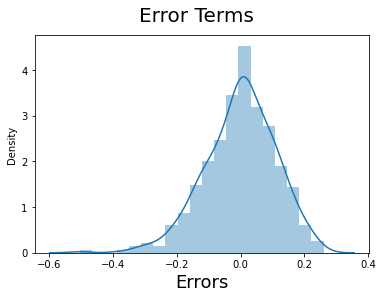

In [77]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

#### from this we see that mean of error terms is centered at zero and it is a normal distribution

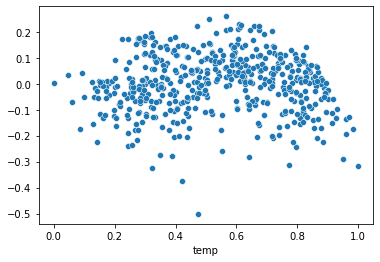

In [78]:
sns.scatterplot(X['temp'], y_train-y_train_pred)
plt.show()

#### The points are quite random, so we can say that the model has decent predictive power.

### Step 7: Making predictions using model

#### before making predictions on the final model, we have to scale the test set as well

In [79]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [80]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,misty,rainy_or_snowy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.266372,0.527146,0.520592,0.255708,0.264840,0.232877,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.217246,0.217921,0.218435,0.437258,0.442259,0.423633,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.002133,0.059486,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.101951,0.359154,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.223712,0.526567,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.362085,0.664742,0.672745,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,1.038708,0.985273,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
y_test = df_test.pop('cnt')
X_test = df_test

#### since our model only takes into account three features namely temp, casual and yr, we subset X_test for the same

In [82]:
X = X_test[['temp','casual','yr']]

In [83]:
X_test_lm = sm.add_constant(X)

#### making predicitions on the test data set

In [84]:
y_test_pred = lr1.predict(X_test_lm)

### Step 8: Model Evaluation

In [85]:
# Note this is not final r2 score, i have tried to improve the model by adding some variables which were removed earlier

from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.550380688950884

Text(0, 0.5, 'y_test_pred')

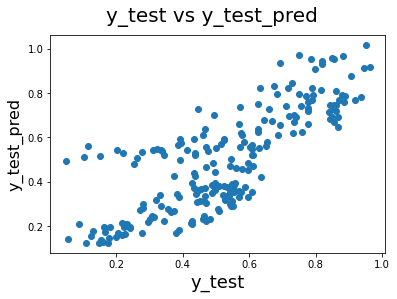

In [86]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

# The r2score of test set does not match closely with the r2score of the Model, we need to improve our model, also we can see that variance of error terms is not quite constant.

## so let us try to add back some of the variables again which had high p value but low VIF. since we have removed registered variable which had high VIF, adding other variables which we had removed might increase the accuracy of the model.

#### adding winter to our model

In [87]:
X = X_train[['temp','casual','yr','winter']]
X_train_lm = sm.add_constant(X)
lr1 = sm.OLS(y_train, X_train_lm).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     467.9
Date:                Sat, 27 Aug 2022   Prob (F-statistic):          2.84e-168
Time:                        15:41:43   Log-Likelihood:                 433.47
No. Observations:                 510   AIC:                            -856.9
Df Residuals:                     505   BIC:                            -835.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0505      0.014      3.714      0.000       0.024       0.077
temp           0.4610      0.025     18.306      0.000       0.412       0.510
casual         0.3376      0.028     12.169      0.000       0.283       0.392
yr             0.2091      0.010     21.921      0.000       0.190       0.228
winter         0.0935      0.011      8.535      0.000       0.072       0.115
==============================================================================
Omnibus:                       81.837   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.558
Skew:                          -0.892   Prob(JB):                     1.12e-36
Kurtosis:                       5.147   Cond. No.                         9.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,temp,4.11
1,casual,3.84
2,yr,2.01
3,winter,1.19


#### adding winter has increased accuracy and is significant and also has low VIF. let us now add summer

In [89]:
X = X_train[['temp','casual','yr','winter','summer']]
X_train_lm = sm.add_constant(X)
lr1 = sm.OLS(y_train, X_train_lm).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     386.0
Date:                Sat, 27 Aug 2022   Prob (F-statistic):          9.66e-170
Time:                        15:41:43   Log-Likelihood:                 440.08
No. Observations:                 510   AIC:                            -868.2
Df Residuals:                     504   BIC:                            -842.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0383      0.014      2.761      0.006       0.011       0.065
temp           0.4659      0.025     18.698      0.000       0.417       0.515
casual         0.3194      0.028     11.460      0.000       0.265       0.374
yr             0.2106      0.009     22.320      0.000       0.192       0.229
winter         0.1069      0.011      9.348      0.000       0.084       0.129
summer         0.0414      0.011      3.637      0.000       0.019       0.064
==============================================================================
Omnibus:                       91.568   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.977
Skew:                          -0.934   Prob(JB):                     5.66e-47
Kurtosis:                       5.557   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,temp,4.29
1,casual,3.93
2,yr,2.01
4,summer,1.45
3,winter,1.26


In [91]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,spring,summer,winter,misty,rainy_or_snowy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.280402,0.951776,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,1,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,1,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0,1,0,1,0


#### adding misty to the model

In [92]:
X = X_train[['temp','casual','yr','winter','summer','misty']]
X_train_lm = sm.add_constant(X)
lr1 = sm.OLS(y_train, X_train_lm).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     337.5
Date:                Sat, 27 Aug 2022   Prob (F-statistic):          8.88e-173
Time:                        15:41:43   Log-Likelihood:                 450.26
No. Observations:                 510   AIC:                            -886.5
Df Residuals:                     503   BIC:                            -856.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0554      0.014      3.926      0.000       0.028       0.083
temp           0.4662      0.024     19.066      0.000       0.418       0.514
casual         0.3017      0.028     10.923      0.000       0.247       0.356
yr             0.2118      0.009     22.869      0.000       0.194       0.230
winter         0.1086      0.011      9.674      0.000       0.087       0.131
summer         0.0455      0.011      4.056      0.000       0.023       0.068
misty         -0.0432      0.010     -4.526      0.000      -0.062      -0.024
==============================================================================
Omnibus:                      114.434   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              323.966
Skew:                          -1.077   Prob(JB):                     4.48e-71
Kurtosis:                       6.257   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,temp,4.73
1,casual,4.06
2,yr,2.04
4,summer,1.48
5,misty,1.46
3,winter,1.30


#### adding rainy_or_snowy

In [94]:
X = X_train[['temp','casual','yr','winter','summer','misty','rainy_or_snowy']]
X_train_lm = sm.add_constant(X)
lr1 = sm.OLS(y_train, X_train_lm).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     354.0
Date:                Sat, 27 Aug 2022   Prob (F-statistic):          1.38e-189
Time:                        15:41:44   Log-Likelihood:                 492.67
No. Observations:                 510   AIC:                            -969.3
Df Residuals:                     502   BIC:                            -935.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0649      0.013      4.981      0.000       0.039       0.091
temp               0.4856      0.023     21.474      0.000       0.441       0.530
casual             0.2554      0.026      9.861      0.000       0.205       0.306
yr                 0.2108      0.009     24.715      0.000       0.194       0.228
winter             0.1211      0.010     11.620      0.000       0.101       0.142
summer             0.0490      0.010      4.740      0.000       0.029       0.069
misty             -0.0566      0.009     -6.360      0.000      -0.074      -0.039
rainy_or_snowy    -0.2401      0.025     -9.531      0.000      -0.290      -0.191
==============================================================================
Omnibus:                       69.273   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.005
Skew:                          -0.787   Prob(JB):                     1.31e-29
Kurtosis:                       4.945   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,temp,4.95
1,casual,4.22
2,yr,2.04
5,misty,1.49
4,summer,1.48
3,winter,1.34
6,rainy_or_snowy,1.10


#### adding humidity to the model

In [96]:
X = X_train[['temp','casual','yr','winter','summer','misty','rainy_or_snowy','hum']]
X_train_lm = sm.add_constant(X)
lr1 = sm.OLS(y_train, X_train_lm).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     311.0
Date:                Sat, 27 Aug 2022   Prob (F-statistic):          7.48e-189
Time:                        15:41:44   Log-Likelihood:                 493.98
No. Observations:                 510   AIC:                            -970.0
Df Residuals:                     501   BIC:                            -931.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0937      0.022      4.229      0.000       0.050       0.137
temp               0.4966      0.024     21.048      0.000       0.450       0.543
casual             0.2536      0.026      9.799      0.000       0.203       0.304
yr                 0.2096      0.009     24.495      0.000       0.193       0.226
winter             0.1249      0.011     11.702      0.000       0.104       0.146
summer             0.0493      0.010      4.776      0.000       0.029       0.070
misty             -0.0470      0.011     -4.389      0.000      -0.068      -0.026
rainy_or_snowy    -0.2254      0.027     -8.419      0.000      -0.278      -0.173
hum               -0.0589      0.037     -1.605      0.109      -0.131       0.013
==============================================================================
Omnibus:                       69.824   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.135
Skew:                          -0.790   Prob(JB):                     4.53e-30
Kurtosis:                       4.966   Cond. No.                         16.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### humidity has high p value so we can remove this and try to add spring in it's place

In [97]:
X = X_train[['temp','casual','yr','winter','summer','misty','rainy_or_snowy','spring']]
X_train_lm = sm.add_constant(X)
lr1 = sm.OLS(y_train, X_train_lm).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     323.6
Date:                Sat, 27 Aug 2022   Prob (F-statistic):          1.90e-192
Time:                        15:41:44   Log-Likelihood:                 502.43
No. Observations:                 510   AIC:                            -986.9
Df Residuals:                     501   BIC:                            -948.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1720      0.027      6.278      0.000       0.118       0.226
temp               0.3700      0.034     10.785      0.000       0.303       0.437
casual             0.2513      0.025      9.873      0.000       0.201       0.301
yr                 0.2134      0.008     25.412      0.000       0.197       0.230
winter             0.0662      0.016      4.109      0.000       0.035       0.098
summer             0.0105      0.013      0.787      0.431      -0.016       0.037
misty             -0.0584      0.009     -6.671      0.000      -0.076      -0.041
rainy_or_snowy    -0.2449      0.025     -9.890      0.000      -0.294      -0.196
spring            -0.0878      0.020     -4.420      0.000      -0.127      -0.049
==============================================================================
Omnibus:                       88.517   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.214
Skew:                          -0.953   Prob(JB):                     4.47e-40
Kurtosis:                       5.212   Cond. No.                         17.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### adding spring has made summer insignificant, so we can keep either spring or summer in our model, let us try to remove summer and see the effect

In [98]:
X = X_train[['temp','casual','yr','winter','misty','rainy_or_snowy','spring']]
X_train_lm = sm.add_constant(X)
lr1 = sm.OLS(y_train, X_train_lm).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     370.0
Date:                Sat, 27 Aug 2022   Prob (F-statistic):          1.30e-193
Time:                        15:41:44   Log-Likelihood:                 502.11
No. Observations:                 510   AIC:                            -988.2
Df Residuals:                     502   BIC:                            -954.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1860      0.021      8.931      0.000       0.145       0.227
temp               0.3559      0.029     12.186      0.000       0.298       0.413
casual             0.2537      0.025     10.047      0.000       0.204       0.303
yr                 0.2135      0.008     25.432      0.000       0.197       0.230
winter             0.0578      0.012      4.775      0.000       0.034       0.082
misty             -0.0582      0.009     -6.650      0.000      -0.075      -0.041
rainy_or_snowy    -0.2449      0.025     -9.895      0.000      -0.294      -0.196
spring            -0.0980      0.015     -6.499      0.000      -0.128      -0.068
==============================================================================
Omnibus:                       89.738   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.246
Skew:                          -0.967   Prob(JB):                     1.62e-40
Kurtosis:                       5.210   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,temp,4.90
1,casual,4.17
2,yr,2.18
4,misty,1.51
3,winter,1.28
6,spring,1.23
5,rainy_or_snowy,1.10


#### we see that removing summer has no effect on adjusted R square value, so we keep spring in our model.

In [100]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,spring,summer,winter,misty,rainy_or_snowy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.280402,0.951776,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,1,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,1,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0,1,0,1,0


#### let us try to add workingday

In [101]:
X = X_train[['temp','casual','yr','winter','misty','rainy_or_snowy','spring','workingday']]
X_train_lm = sm.add_constant(X)
lr1 = sm.OLS(y_train, X_train_lm).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     564.3
Date:                Sat, 27 Aug 2022   Prob (F-statistic):          4.72e-245
Time:                        15:41:44   Log-Likelihood:                 625.95
No. Observations:                 510   AIC:                            -1234.
Df Residuals:                     501   BIC:                            -1196.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0541      0.018      3.010      0.003       0.019       0.089
temp               0.2233      0.024      9.256      0.000       0.176       0.271
casual             0.5941      0.028     21.507      0.000       0.540       0.648
yr                 0.1814      0.007     26.539      0.000       0.168       0.195
winter             0.0763      0.010      7.983      0.000       0.058       0.095
misty             -0.0471      0.007     -6.827      0.000      -0.061      -0.034
rainy_or_snowy    -0.1983      0.020    -10.111      0.000      -0.237      -0.160
spring            -0.0596      0.012     -4.947      0.000      -0.083      -0.036
workingday         0.1679      0.009     17.698      0.000       0.149       0.187
==============================================================================
Omnibus:                      112.959   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              381.586
Skew:                          -1.001   Prob(JB):                     1.38e-83
Kurtosis:                       6.735   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,temp,12.42
1,casual,7.17
7,workingday,5.02
2,yr,2.36
4,misty,1.51
3,winter,1.35
6,spring,1.32
5,rainy_or_snowy,1.10


#### adding working day has increased r score but has also increased VIF of temp, let's try to remove temp so see if adjusted r score drops or not.

In [103]:
X = X_train[['casual','yr','winter','misty','rainy_or_snowy','spring','workingday']]
X_train_lm = sm.add_constant(X)
lr1 = sm.OLS(y_train, X_train_lm).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     541.4
Date:                Sat, 27 Aug 2022   Prob (F-statistic):          2.77e-229
Time:                        15:41:44   Log-Likelihood:                 585.69
No. Observations:                 510   AIC:                            -1155.
Df Residuals:                     502   BIC:                            -1122.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1552      0.015     10.054      0.000       0.125       0.185
casual             0.7034      0.027     26.051      0.000       0.650       0.756
yr                 0.1773      0.007     24.046      0.000       0.163       0.192
winter             0.0350      0.009      3.832      0.000       0.017       0.053
misty             -0.0483      0.007     -6.475      0.000      -0.063      -0.034
rainy_or_snowy    -0.1856      0.021     -8.774      0.000      -0.227      -0.144
spring            -0.1212      0.011    -11.170      0.000      -0.142      -0.100
workingday         0.1952      0.010     20.020      0.000       0.176       0.214
==============================================================================
Omnibus:                       93.239   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.891
Skew:                          -0.935   Prob(JB):                     8.88e-50
Kurtosis:                       5.671   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,yr,2.34
6,workingday,1.98
0,casual,1.91
3,misty,1.46
2,winter,1.32
5,spring,1.29
4,rainy_or_snowy,1.06


#### we can see that adjusted r score with temp and without workday is 0.835, and adjusted r score with workday and without temp is 0.881, so we keep workday 

#### adding holiday to the model

In [105]:
X = X_train[['casual','yr','winter','misty','rainy_or_snowy','spring','workingday','holiday']]
X_train_lm = sm.add_constant(X)
lr1 = sm.OLS(y_train, X_train_lm).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     473.4
Date:                Sat, 27 Aug 2022   Prob (F-statistic):          4.84e-228
Time:                        15:41:44   Log-Likelihood:                 586.02
No. Observations:                 510   AIC:                            -1154.
Df Residuals:                     501   BIC:                            -1116.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1521      0.016      9.567      0.000       0.121       0.183
casual             0.7070      0.027     25.818      0.000       0.653       0.761
yr                 0.1770      0.007     23.959      0.000       0.162       0.192
winter             0.0351      0.009      3.836      0.000       0.017       0.053
misty             -0.0478      0.007     -6.400      0.000      -0.063      -0.033
rainy_or_snowy    -0.1844      0.021     -8.694      0.000      -0.226      -0.143
spring            -0.1207      0.011    -11.105      0.000      -0.142      -0.099
workingday         0.1974      0.010     19.459      0.000       0.178       0.217
holiday            0.0183      0.023      0.803      0.422      -0.026       0.063
==============================================================================
Omnibus:                       96.865   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.488
Skew:                          -0.960   Prob(JB):                     6.01e-53
Kurtosis:                       5.762   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### we can see that holiday is insignificant to the model, so we can remove it.

In [106]:
X = X_train[['casual','yr','winter','misty','rainy_or_snowy','spring','workingday']]
X_train_lm = sm.add_constant(X)
lr1 = sm.OLS(y_train, X_train_lm).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     541.4
Date:                Sat, 27 Aug 2022   Prob (F-statistic):          2.77e-229
Time:                        15:41:44   Log-Likelihood:                 585.69
No. Observations:                 510   AIC:                            -1155.
Df Residuals:                     502   BIC:                            -1122.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1552      0.015     10.054      0.000       0.125       0.185
casual             0.7034      0.027     26.051      0.000       0.650       0.756
yr                 0.1773      0.007     24.046      0.000       0.163       0.192
winter             0.0350      0.009      3.832      0.000       0.017       0.053
misty             -0.0483      0.007     -6.475      0.000      -0.063      -0.034
rainy_or_snowy    -0.1856      0.021     -8.774      0.000      -0.227      -0.144
spring            -0.1212      0.011    -11.170      0.000      -0.142      -0.100
workingday         0.1952      0.010     20.020      0.000       0.176       0.214
==============================================================================
Omnibus:                       93.239   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.891
Skew:                          -0.935   Prob(JB):                     8.88e-50
Kurtosis:                       5.671   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,yr,2.34
6,workingday,1.98
0,casual,1.91
3,misty,1.46
2,winter,1.32
5,spring,1.29
4,rainy_or_snowy,1.06


#### adding windspeed

In [108]:
X = X_train[['casual','yr','winter','misty','rainy_or_snowy','spring','workingday','windspeed']]
X_train_lm = sm.add_constant(X)
lr1 = sm.OLS(y_train, X_train_lm).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     491.5
Date:                Sat, 27 Aug 2022   Prob (F-statistic):          1.20e-231
Time:                        15:41:44   Log-Likelihood:                 594.48
No. Observations:                 510   AIC:                            -1171.
Df Residuals:                     501   BIC:                            -1133.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1946      0.018     10.895      0.000       0.159       0.230
casual             0.6790      0.027     24.972      0.000       0.626       0.732
yr                 0.1800      0.007     24.716      0.000       0.166       0.194
winter             0.0303      0.009      3.336      0.001       0.012       0.048
misty             -0.0502      0.007     -6.833      0.000      -0.065      -0.036
rainy_or_snowy    -0.1811      0.021     -8.690      0.000      -0.222      -0.140
spring            -0.1215      0.011    -11.380      0.000      -0.142      -0.100
workingday         0.1881      0.010     19.315      0.000       0.169       0.207
windspeed         -0.0873      0.021     -4.192      0.000      -0.128      -0.046
==============================================================================
Omnibus:                       92.308   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.860
Skew:                          -0.922   Prob(JB):                     9.02e-50
Kurtosis:                       5.688   Cond. No.                         15.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
7,windspeed,3.63
6,workingday,2.38
0,casual,2.36
1,yr,2.34
5,spring,1.60
3,misty,1.48
2,winter,1.37
4,rainy_or_snowy,1.09


In [110]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,spring,summer,winter,misty,rainy_or_snowy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.280402,0.951776,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,1,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,1,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0,1,0,1,0


### Residual analysis of train data for final model

In [111]:
y_train_pred = lr1.predict(X_train_lm)

Text(0.5, 0, 'Errors')

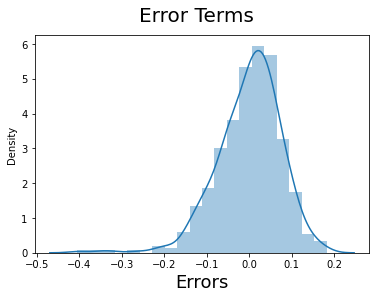

In [112]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

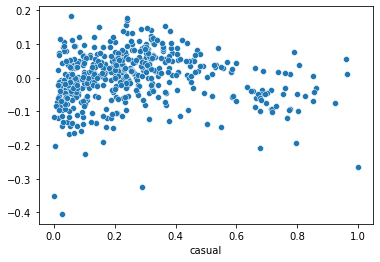

In [113]:
sns.scatterplot(X['casual'], y_train-y_train_pred)
plt.show()

#### we see that our model is pretty decent, let us carry out testing.

### Making predictions using the final model

In [114]:
# we have already scaled the test data set and we also have y_test

X_test = df_test

In [115]:
X = X_test[['casual','yr','winter','misty','rainy_or_snowy','spring','workingday','windspeed']]
X_test_lm = sm.add_constant(X)

In [116]:
y_test_pred = lr1.predict(X_test_lm)

### Model Evaluation

In [117]:
r2_score(y_test,y_test_pred)

0.8611149421744706

Text(0, 0.5, 'y_test_pred')

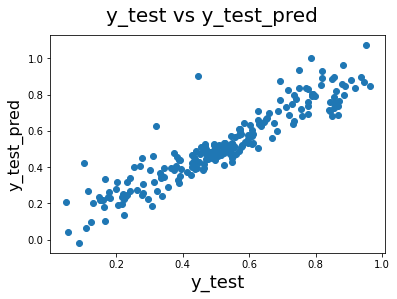

In [118]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

#### the r2score is very close to the r2score obtained from our model, also we can see from the graph that variance is somewhat constant in the error terms, hence we can say that this can be our final model.

### Looking at the model to interpret the variables

In [119]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     491.5
Date:                Sat, 27 Aug 2022   Prob (F-statistic):          1.20e-231
Time:                        15:41:45   Log-Likelihood:                 594.48
No. Observations:                 510   AIC:                            -1171.
Df Residuals:                     501   BIC:                            -1133.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1946      0.018     10.895      0.000       0.159       0.230
casual             0.6790      0.027     24.972      0.000       0.626       0.732
yr                 0.1800      0.007     24.716      0.000       0.166       0.194
winter             0.0303      0.009      3.336      0.001       0.012       0.048
misty             -0.0502      0.007     -6.833      0.000      -0.065      -0.036
rainy_or_snowy    -0.1811      0.021     -8.690      0.000      -0.222      -0.140
spring            -0.1215      0.011    -11.380      0.000      -0.142      -0.100
workingday         0.1881      0.010     19.315      0.000       0.169       0.207
windspeed         -0.0873      0.021     -4.192      0.000      -0.128      -0.046
==============================================================================
Omnibus:                       92.308   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.860
Skew:                          -0.922   Prob(JB):                     9.02e-50
Kurtosis:                       5.688   Cond. No.                         15.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Significant Variables

1. casual
2. yr
3. winter
4. misty
5. rainy_or_snowy
6. spring
7. workingday
8. windspeed

# Interpretations

1. as the number of casual users increase, more people become interested in bike sharing service and register themselves for the same.
2. we can see that yearr has positive impact on cnt, which means from 2018 to 2019 more people are using the service. i.e bike sharing services are gaining popularity.
3. winter has a small positive correlation, this might mean that for small errands or small distances people prefer bikes than cars since it is a hassle to heat up the engine of car.
4. during misty, rainy_or_snowy weather it is definitely more feasible to take a car than a bike, since it becomes difficult to ride a bike in these conditions. however the impact of mist is quite less as compared to rainy_or_snowy conditions.
5. if windspeed is high then too driving bikes becomes difficult.
6. more people use bike service on a workingday than on a holiday.
7. spring has a negative coefficient which is surprising. It might mean that holidays of school kids fall during spring break and hence people move to their hometowns or spend time with their family which leads to less usage of bike service.